In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [56]:
epilepsy_data = pd.read_csv('https://raw.githubusercontent.com/AlephG/Epileptic-Seizure-Recognition/main/Epileptic%20Seizure%20Recognition.csv')
epilepsy_data.head(10)

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,...,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,...,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,...,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,...,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,...,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,...,38,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73,5
5,X14.V1.56,55,28,18,16,16,19,25,40,52,66,81,98,111,122,105,85,66,51,34,19,16,8,-5,-21,-18,-14,3,27,46,57,60,51,35,22,20,28,28,35,43,...,-4,-17,-30,-45,-71,-81,-78,-69,-60,-45,-33,-25,-14,-2,3,-5,-18,-39,-61,-73,-77,-76,-79,-64,-40,-25,0,9,12,-6,-12,-31,-42,-54,-60,-64,-60,-56,-55,5
6,X3.V1.191,-55,-9,52,111,135,129,103,72,37,0,-38,-77,-113,-128,-121,-105,-71,-27,13,44,60,64,40,30,25,28,34,31,18,-19,-53,-76,-81,-74,-57,-36,-21,12,55,...,94,109,107,88,52,5,-24,-37,-50,-58,-66,-65,-60,-45,-20,1,23,50,74,99,125,141,129,95,41,-21,-77,-117,-135,-137,-125,-99,-79,-62,-41,-26,11,67,128,4
7,X11.V1.273,1,-2,-8,-11,-12,-17,-15,-16,-18,-17,-19,-18,-16,-15,-14,-21,-19,-24,-24,-24,-17,-20,-23,-15,-17,-20,-18,-19,-20,-19,-18,-20,-25,-27,-24,-22,-20,-9,0,...,-20,-26,-24,-25,-35,-41,-41,-53,-61,-58,-59,-55,-53,-65,-78,-87,-97,-100,-106,-104,-107,-110,-110,-109,-104,-118,-111,-102,-80,-67,-79,-91,-97,-88,-76,-72,-66,-57,-39,2
8,X19.V1.874,-278,-246,-215,-191,-177,-167,-157,-139,-118,-92,-63,-39,-11,14,36,60,70,78,79,69,27,-45,-123,-183,-218,-242,-256,-256,-236,-205,-165,-125,-84,-41,-10,12,35,58,71,...,74,79,81,76,65,63,62,65,67,70,63,45,20,-11,-32,-26,3,40,85,124,182,248,349,418,419,291,73,-152,-311,-386,-400,-379,-336,-281,-226,-174,-125,-79,-40,1
9,X3.V1.491,8,15,13,3,-6,-8,-5,4,25,41,48,44,34,16,-2,-11,-24,11,33,43,48,42,33,14,-1,-7,-17,-36,-59,-74,-88,-84,-64,-37,-8,24,47,49,42,...,39,29,12,-8,-10,-13,-12,-7,1,3,6,13,12,7,0,2,2,15,28,27,18,2,-5,-6,13,41,66,72,68,65,49,31,11,-5,-17,-19,-15,-15,-11,4


Text(0.5, 0, 'Samples')

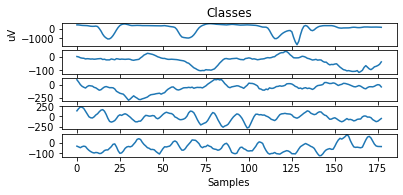

In [57]:
#visualize the data
data = epilepsy_data.iloc[:,1:179].values #can change this to X
plt.subplot(811)
plt.plot(data[1,:])
plt.title('Classes')
plt.ylabel('uV')
plt.subplot(812)
plt.plot(data[7,:])
plt.subplot(813)
plt.plot(data[12,:])
plt.subplot(814)
plt.plot(data[0,:])
plt.subplot(815)
plt.plot(data[2,:])
plt.xlabel('Samples')

In [59]:
#Column 0 is unnecessary
data = epilepsy_data.drop(labels='Unnamed', axis=1)
#we only want to classify as epileptic versus non-expileptic
pred = data.iloc[:,178].values
pred[pred>1] = 0
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,-14,...,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,312,...,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,-15,...,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,-69,...,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,1,...,38,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73,0


In [60]:
#make sure there is no null data
data.isnull().sum()

X1      0
X2      0
X3      0
X4      0
X5      0
       ..
X175    0
X176    0
X177    0
X178    0
y       0
Length: 179, dtype: int64

In [ ]:
#Select training set and test set
X = np.array(data.iloc[:,1:179])
Y = np.array(data['y'])

X = preprocessing.scale(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y)


In [63]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train, y_train)
clf.score(X_test, y_test)

1.0

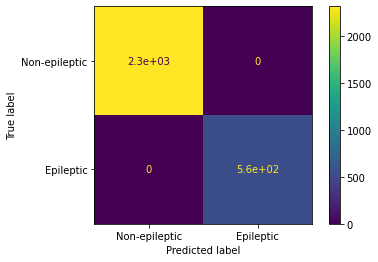

In [71]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = clf.predict(X_test)
c = confusion_matrix(y_test, y_pred)
c = ConfusionMatrixDisplay(c, ('Non-epileptic', 'Epileptic'))
c.plot()